In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

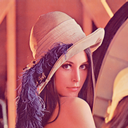

In [3]:
img = Image.open('lenna.png')

img = img.resize((128,128), Image.ANTIALIAS)
img

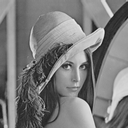

In [4]:
imggs = img.convert('L')
imggs 

0.49310302734375

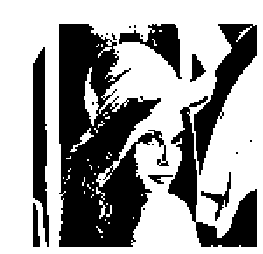

In [5]:
th_value = 128

imgbw = np.asarray(imggs)  

imgbw = (imgbw > th_value) * 1

imgbw = 1 - imgbw

plt.matshow(imgbw, cmap='Greys')
a = plt.axis('off')
1 - np.mean(imgbw)

In [6]:
from scipy.stats import binom

np.random.seed(123)

N = 16384  # number of nodes 128x128 pixels
k = 100  # avg. number of connections per node
P = 9  # random patterns to learn

# C := Network structure (connectivity topology)
C = np.zeros((N,k), dtype='int')
for i in range(N):
    for ki in range(k//2):
        C[i, ki] = i + (ki+1)
        C[i, ki+k//2] = i - (ki + 1)
C[np.where(C < 0)] = C[np.where(C < 0)] + N
C[np.where(C >= N)] = C[np.where(C >= N)] - N

W = np.array([np.zeros(len(ci)) for ci in C])

X = binom.rvs(n=1, p=0.5, size=(P, N))*2 - 1  # P random patterns

lenna = imgbw.reshape(1, 16384)*2 - 1

X = np.concatenate((X, lenna))  # Lenna image (concatenates at the end)

M = []

# Learn all patterns x in X
for pi, x in enumerate(X):
    for i in range(N):
        W[i] = W[i] + x[C[i]]*x[i]  # update weights, learn x
    
print('Learning has finished!')

Learning has finished!


(0, 1)

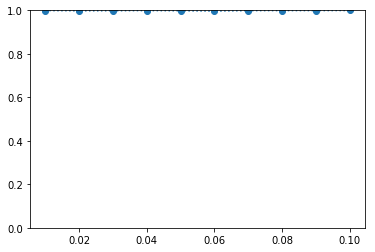

In [7]:
M = []

# for each pattern x
for pi, x in enumerate(X):
        
    xt = np.copy(x)  # init network in pattern x  
        
    m = [np.sum(x * x) / N]  # initial overlap

    for ti in range(100):
        # network update for t=100
        xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
        m += [np.sum(x * xt) / N]  # test overlap x and xt (net state)
        if m[-1] == m[-2]:
            break
    M += [m[-1]]

plt.plot(np.array(range(1,P+2))/k, M, ':o')
plt.ylim((0,1))

array([[ 1, -1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1, -1, -1, ..., -1,  1,  1]])

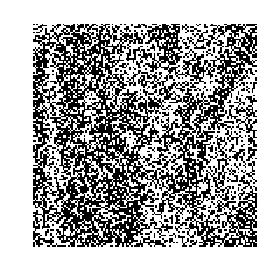

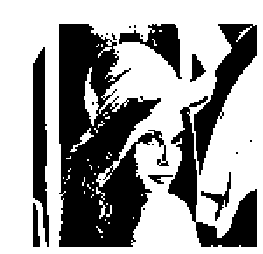

In [8]:
noise_level = 0.75

noisy_lenna = lenna.copy()

for i in range(np.shape(noisy_lenna)[1]):
    if np.random.random() < noise_level:
        noisy_lenna[0, i] = np.random.randint(2)*2 - 1

plt.matshow(noisy_lenna.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

x = X[-1] 
plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

noisy_lenna.reshape((128,128))

0.8094482421875

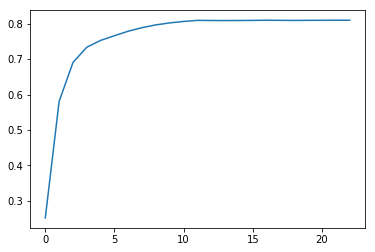

In [9]:
x = X[-1]  # Learned Lenna is in X, last pattern

xt = np.copy(noisy_lenna.flatten())  # init network in noisy lenna  
        
m = [np.sum(x * xt) / N]  # initial overlap

for ti in range(100):
    # network update for t=100
    xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
    m += [np.sum(x * xt) / N]  # test overlap x and xt (net state)
    if m[-1] == m[-2]:
        break
        
plt.plot(m)
m[-1]

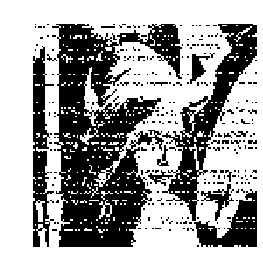

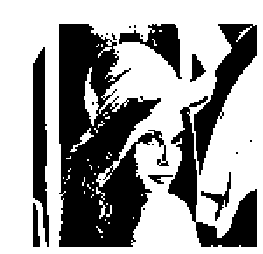

In [10]:
plt.matshow(xt.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

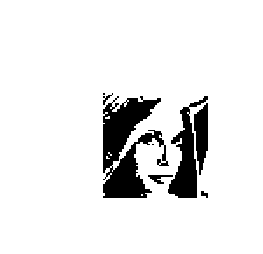

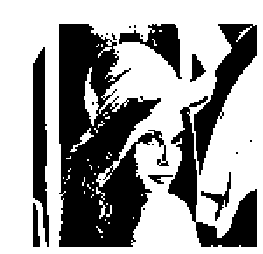

In [12]:
lenna_rostro = np.zeros((128,128), dtype='int')

lenna_rostro[40:100,40:100] = imgbw[40:100,40:100]

plt.matshow(lenna_rostro, cmap='Greys')
a = plt.axis('off')

x = X[-1] 
plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

0.4478759765625

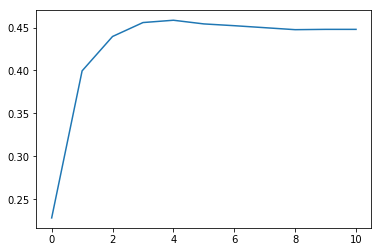

In [13]:
lenna_rostro = np.zeros((128,128), dtype='int')

lenna_rostro[40:100,40:100] = imgbw[40:100,40:100]

x = X[-1]  # Learned Lenna is in X, last pattern

xt = np.copy(lenna_rostro.flatten()*2 - 1)  # init network in noisy lenna  
        
m = [np.sum(x * xt) / N]  # initial overlap

for ti in range(100):
    # network update for t=100
    xt = np.array([int(np.sum(xt[C[nxi]]*W[nxi]) >= 0)*2-1 for nxi in range(N)])
    m += [np.sum(x * xt) / N]  # test overlap x and xt (net state)
    if m[-1] == m[-2]:
        break
        
plt.plot(m)
m[-1]

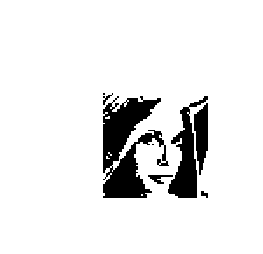

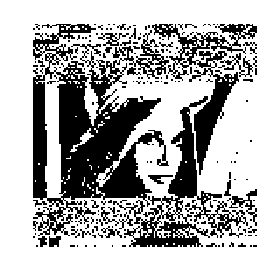

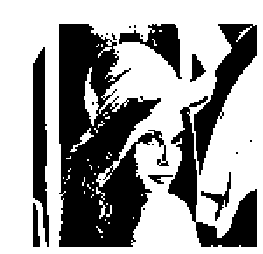

In [14]:
plt.matshow(lenna_rostro, cmap='Greys')
a = plt.axis('off')

plt.matshow(xt.reshape((128,128)), cmap='Greys')
a = plt.axis('off')

plt.matshow(x.reshape((128,128)), cmap='Greys')
a = plt.axis('off')